# <center>__MÉTODOS NUMÉRICOS__</center>
## <center>__PROJETO DA UNIDADE 2__</center>

#### <center>ALUNO: Hércules de Sousa Silva </center>

<div class="alert alert-block alert-info">
    <h1>1. INTRODUÇÃO</h1>
</div>

## Processamento de Linguagem Natural
Um dos grandes desafios para a evolução da Inteligência Artificial é a compreensão da linguagem humana, pois com sua dinamicidade e diversidade a captura de padrões se torna um verdadeiro e complexo empecilho. Nesse sentido, tem-se o Processamento de Linguagem Natural como uma sub-área exclusivamente dedicada a essa problemática, que se utilizada de técnicas e métodos para compreender a língua, tanto escrita quanto falada. Uma das estratégias utilizadas para essa compreensão é a **modelagem de tópicos** encontrados no texto que está sendo estudado. 

## Modelagem de Tópicos
Um **tópico** pode ser definido como um padrão recorrente de co-ocorrência de palavras, isto é, são palavras que possuem uma semântica semelhante e estão dispostas com certa frequência ao longo do texto.
Uma forma de compreender como o processo de modelagem de tópicos funciona é se imaginar trabalhando em um artigo com diferentes marcadores de texto. À medida que você lê o artigo, você usa uma cor diferente para as diferentes palavras chave dos temas . Ao terminar, é possível copiar as palavras, agrupando-as por cor. Essa lista de palavras é um tópico, e cada cor representa tópicos diferentes.
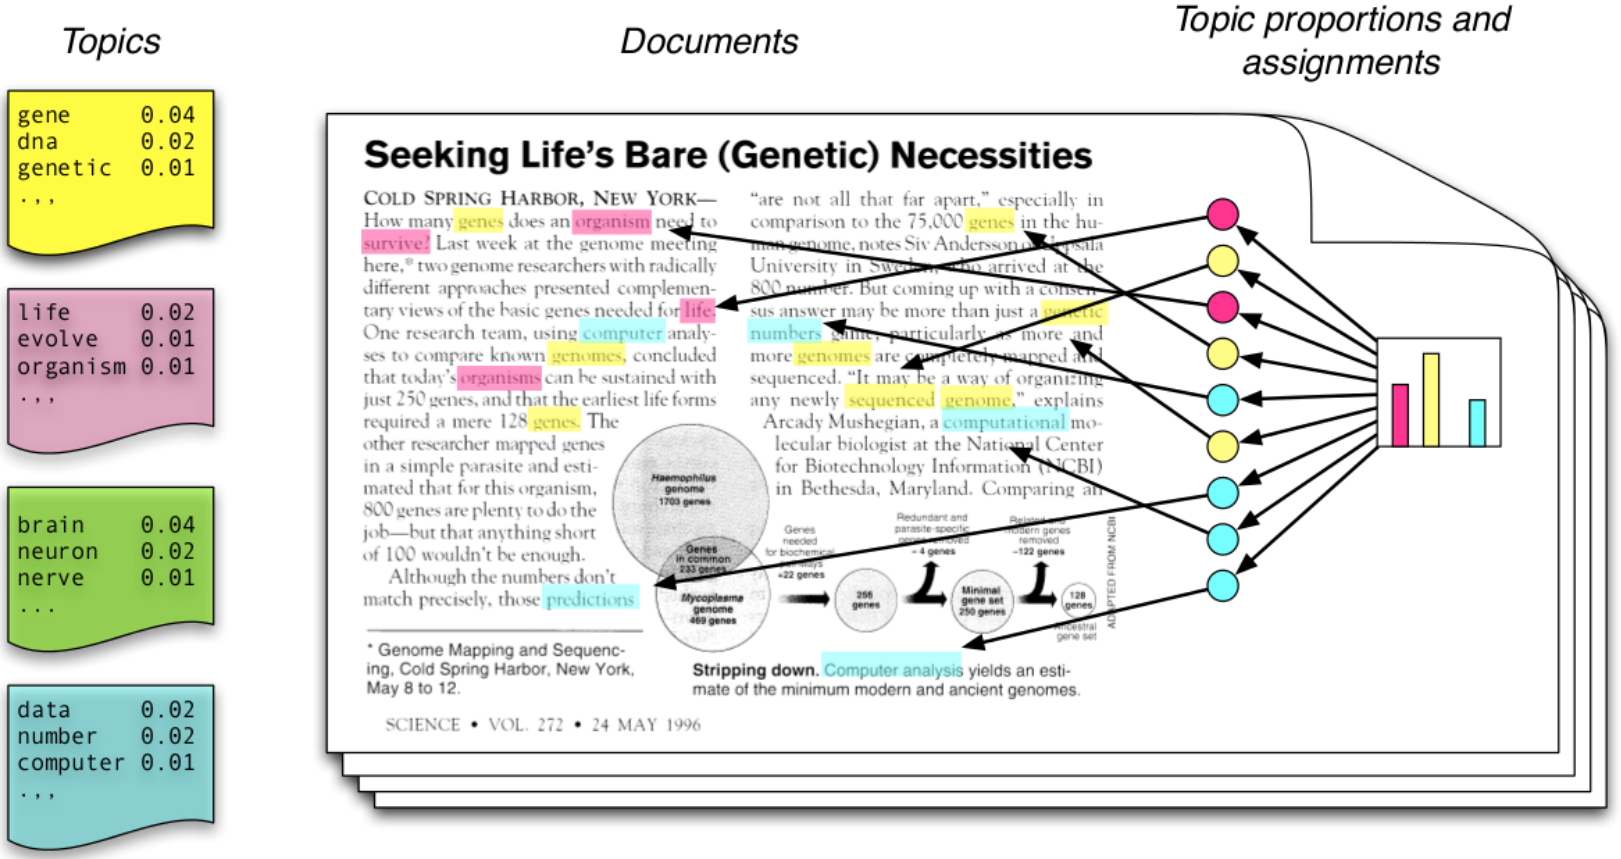

## As técnicas utilizadas
Para a modelagem de tópicos serão abordados nesse notebook duas técnicas vastamente utilizadas, são elas:
* **Non-Negative Matrix Factorization (NMF)**: na qual uma dada matriz **V** é decomposta em duas matrizes comumente chamadas de **W** e **H** que possuem a característica e não terem nenhuma entrada negativa.
* **Singular Value Decomposition (SVD)**: decompõe uma matriz **M** nas matrizes $U \Sigma V*$, Onde **U** é uma matriz unitária m x m real ou complexa, $\Sigma$ é uma matriz retangular diagonal m x n com números reais não-negativos e **V*** é a conjugada transposta de **V**, sendo **V** uma matriz unitária n x n real ou complexa.

<div class="alert alert-block alert-info">
    <h1>2. DESCRIÇÃO DO PROBLEMA</h1>
</div>

Nessa seção você descreverá o problema que será atacado, com o máximo de precisão possível. Tente apresentar as características do problema, bem como as aplicações associadas a ele.

A **modelagem de tópicos** é um dos vários problemas que a área de Processamento Natural de Linguagem tenta resolver, ele é particularmente utilizado para descobrir estruturas semânticas ocultas no corpo de um texto, baseando-se no pressuposto de que se um texto fala de um determinado tema, palavras contidas nesse tema aparecerão com maior frequência ao longo do documento analisado. Algumas das questões mais intrínsecas a esta problemática são como separar as palavras em seus devidos tópicos, quais são as palavras que devem ser consideradas e quais não devem, e como muitos dos problemas em na área de Computação a resposta é que depende do seu objetivo e da métrica utilizada. A modelagem de tópicos é utilizada, como já mencionado, no Processamento Natural de Linguagem, na área de Bioinformática e Visão Computacional, além de outras.

<div class="alert alert-block alert-info">
    <h1>3. MÉTODOS APLICADOS À SOLUÇÃO</h1>
</div>

Nessa seção, você descreverá que métodos numéricos usará para solucionar o problema acima, explicando como esses métodos funcionam, para que tipos de problemas eles são úteis e, principalmente, porque são úteis para o problema descrito na seção anterior

<div class="alert alert-block alert-info">
    <h1>4. IMPLEMENTAÇÃO</h1>
</div>

### Importando bibliotecas
Será utilizado neste notebook o banco de dados **Newsgroup** do Scikit-Learn formado por grupos de discussões na Usenet, que é uma rede não controlada por uma única fonte, isto é, descentralizada, muito popular nos anos 80 e 90 antes da Web. Esse banco contém 18000 posts e 20 tópicos.

In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy import linalg
import matplotlib.pyplot as plt

%matplotlib inline
np.set_printoptions(suppress=True)

In [2]:
def get_topics(matrix, vocab, num_top_words):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words - 1:-1]]
    topic_words = ([top_words(t) for t in matrix])
    return [' '.join(t) for t in topic_words]


def get_topics_with_svd(database, num_top_words, stop_words='english'):
    U, s, Vh = linalg.svd(vectors, full_matrices=False)
    return get_topics(Vh, vocab, num_top_words)

def get_topics_with_nmf(database, num_top_words, topic_number, stop_words='english'):
    clf = decomposition.NMF(n_components=topic_number, random_state=1)

    W1 = clf.fit_transform(np.asarray(vectors))
    H1 = clf.components_
    
    return get_topics(H1, vocab, num_top_words)

<div class="alert alert-block alert-info">
    <h1>5. CASOS DE USO</h1>
</div>

# Exemplo usado no notebook de referência

## Definindo temas e obtendo dados
Para os conjuntos de dados obtidos serão removidos cabeçalhos, rodapés e citações.

In [3]:
#categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
#remove = ('headers', 'footers', 'quotes')
#newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)

In [4]:
#newsgroups_train.filenames.shape

In [5]:
#vectorizer = CountVectorizer(stop_words="english")
#vectors = vectorizer.fit_transform(newsgroups_train.data).todense()
#vocab = np.array(vectorizer.get_feature_names())

## Obtendo tópicos:

### Singular Value Decomposition

In [6]:
#topic_list = get_topics_with_svd(newsgroups_train, 8)

In [7]:
#len(topic_list)

In [8]:
#topic_list

### Non-Negative Matrix Factorization

In [9]:
# topic_list = get_topics_with_nmf(newsgroups_train, 8, 5)

In [10]:
# topic_list

# Meu exemplo utilizando todas as categorias do dataset

## Obtendo dados


In [11]:
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)

In [12]:
newsgroups_train.filenames.shape

(11314,)

In [13]:
vectorizer = CountVectorizer(stop_words="english")
vectors = vectorizer.fit_transform(newsgroups_train.data).todense()
vocab = np.array(vectorizer.get_feature_names())

## Obtendo tópicos:

### Singular Value Decomposition

In [ ]:
topic_list = get_topics_with_svd(newsgroups_train, 2)

In [ ]:
len(topic_list)

In [ ]:
topic_list

### Non-Negative Matrix Factorization

In [ ]:
topic_list = get_topics_with_nmf(newsgroups_train, 10, 5)

In [ ]:
topic_list